Author: Sarah Ling

Date: 11/12/21

# Assignment 2: K Nearest Neighbors Implementation



#### Part 2: Test your implementation and compare its performance with the sklearn algorithm using the provided Titanic dataset
In a Jupyter notebook, use both your knn algorithm and the sklearn version to predict the "Survived" column in the Titanic dataset. Split the data into train_x, train_y, test_x, and test_y. Use a for loop to provide different values for k, each time fitting with the training data and generating predictions with the testing data. Calculate the accuracy score for each k value.

In [1]:
#Importing the necessary libraries and csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Performing PCA on Titanic Dataset

- The Titanic dataset will need to be cleaned up and processed because:
- there is incomplete information that will need to be taken care of (via replacing or dropping)
- kNN is unable to process strings so those strings will need to be taken care of (via replacing with numerics)
- Certain features are irrelevant (values are unique)

In [2]:
#check for null values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
#Replace missing values for age with Median Age

age_median = df["Age"].median()
df["Age"] = df["Age"].fillna(age_median)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Null values for Cabin will not be dropped because the "Cabin" column will be dropped later
#Null values for Embarked will be dropped because it is not a numeric value where the average can be found (and there is only 2)

df = df.dropna(subset=["Embarked"])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
#Cleaning up train_x data. Getting rid of unique data
train_x = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
train_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
#Checking how how many unique values in "sex"
#Since only 2, it can easily be converted to numbers (0,1)
train_x["Sex"].unique()

array(['male', 'female'], dtype=object)

In [7]:
#Checking how how many unique values in "Pclass"
train_x["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [8]:
#Checking how how many unique values in "Embarked"
#Since only 3, it can easily be converted to numbers (0,1,2)
train_x["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [9]:
#Convert string values in "Sex" to numerical values using labeling encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_x["Sex"])

train_x["Sex"] = le.transform(train_x["Sex"])

In [10]:
#Convert string values in "Embarked" to numerical values using labeling encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_x["Embarked"])

#gives array
train_x["Embarked"] = le.transform(train_x["Embarked"])



In [11]:
#Embarked: c = 0; Q = 1, S = 2
#Sex: female = 0, male = 1

#Checking if values have been converted successfully (they have!)
train_x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [12]:
#I am interested in seeing the correlation between features

corr= train_x.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.020933
SibSp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.020933,0.068900,0.040449,-0.226311,1.000000


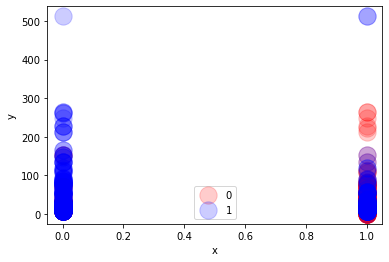

In [13]:
#Correlation between survival and sex/Price of Fare

colors = {0: 'red', 1: 'blue'}

#create new df, x, y, and use z coordinate as label
df2 = pd.DataFrame(dict(x=train_x.iloc[:,2], y=train_x.iloc[:,6], label=train_x.iloc[:,0]))

grouped = df2.groupby('label')
fix, ax = plt.subplots()

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], s=300, alpha=0.2)
    
plt.show()

In [14]:
# wealth has barely any correlation to survival (there's no wealth discrimination)
# Sex has a stronger correleation to survival (females are more likely to survive than males)

In [15]:
train_x = train_x.drop(columns=["Survived"])


In [16]:
#splitting my cleaned up titanic dataset into train (70%) and test datasets(30%)

from sklearn.model_selection import train_test_split

train_y = df.iloc[:,1]
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.3, random_state = 3)

In [17]:
#Converting my datasets into numpy arrays

train_x = train_x.to_numpy()
test_x = test_x.to_numpy()
train_y = train_y.to_numpy()

## Comparing SKLearn kNN and My kNN (kNN_SL)
- KNN_SL produced results that were very close to the accuracy of SKLearn kNN (by 0.77%)
- kNN_SL is overall more accurate than SKLearn kNN (WOW!)
- However, kNN_SL runs slower (In the future, I would look for ways to improve kNN_SL's time complexity)
- For SKLearn kNN, highest accuracy achieved when k = 10, 11
- For kNN_SL, highest accuracy achieved when k = 11

In [18]:
#applying sklearn kNN

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn_accuracies = []

print("SKLEARN kNN Implementation:")
for num in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_x, train_y)
    hyp_knn = knn.predict(test_x)
    sklearn_knn_accuracies.append(accuracy_score(test_y, hyp_knn))
    print("Accuracy score when k =",num,":",accuracy_score(test_y, hyp_knn))

sklearn_knn_accuracies = np.array(sklearn_knn_accuracies)

SKLEARN kNN Implementation:
Accuracy score when k = 2 : 0.6441947565543071
Accuracy score when k = 3 : 0.6629213483146067
Accuracy score when k = 4 : 0.6666666666666666
Accuracy score when k = 5 : 0.6853932584269663
Accuracy score when k = 6 : 0.6928838951310862
Accuracy score when k = 7 : 0.6891385767790262
Accuracy score when k = 8 : 0.6891385767790262
Accuracy score when k = 9 : 0.6966292134831461
Accuracy score when k = 10 : 0.704119850187266
Accuracy score when k = 11 : 0.704119850187266
Accuracy score when k = 12 : 0.6853932584269663
Accuracy score when k = 13 : 0.6928838951310862
Accuracy score when k = 14 : 0.6816479400749064
Accuracy score when k = 15 : 0.6816479400749064
Accuracy score when k = 16 : 0.6779026217228464
Accuracy score when k = 17 : 0.6779026217228464
Accuracy score when k = 18 : 0.6704119850187266
Accuracy score when k = 19 : 0.6816479400749064


In [19]:
#SKLearn kNN Confusion Matrix when k = 10

knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(train_x, train_y)
hyp_knn_10 = knn_10.predict(test_x)
confusion_matrix(test_y, hyp_knn_10)

#TN, FP
#FN, TP

array([[139,  19],
       [ 60,  49]], dtype=int64)

In [20]:
#Applying kNN_SL

from knn import KNN_SL

SL_knn_accuracies = []

print("Sarah's kNN Implementation:")
for num in range(2, 20):
    knn2 = KNN_SL(n_neighbors = num)
    knn2.fit(train_x, train_y)
    hyp_knn_SL = knn2.predict(test_x)
    SL_knn_accuracies.append(accuracy_score(test_y, hyp_knn_SL))
    print("Accuracy score when k =",num,":",accuracy_score(test_y, hyp_knn_SL))
    
SL_knn_accuracies = np.array(SL_knn_accuracies)

Sarah's kNN Implementation:
Accuracy score when k = 2 : 0.6479400749063671
Accuracy score when k = 3 : 0.6666666666666666
Accuracy score when k = 4 : 0.6741573033707865
Accuracy score when k = 5 : 0.6816479400749064
Accuracy score when k = 6 : 0.704119850187266
Accuracy score when k = 7 : 0.6891385767790262
Accuracy score when k = 8 : 0.6928838951310862
Accuracy score when k = 9 : 0.6966292134831461
Accuracy score when k = 10 : 0.7116104868913857
Accuracy score when k = 11 : 0.704119850187266
Accuracy score when k = 12 : 0.704119850187266
Accuracy score when k = 13 : 0.6928838951310862
Accuracy score when k = 14 : 0.6891385767790262
Accuracy score when k = 15 : 0.6816479400749064
Accuracy score when k = 16 : 0.6816479400749064
Accuracy score when k = 17 : 0.6816479400749064
Accuracy score when k = 18 : 0.6891385767790262
Accuracy score when k = 19 : 0.6816479400749064


In [21]:
#SL kNN Confusion Matrix when k = 10


knn2_10 = KNN_SL(n_neighbors = 10)
knn2_10.fit(train_x, train_y)
hyp_knn_SL_10 = knn2_10.predict(test_x)
confusion_matrix(test_y, hyp_knn_SL_10)

#TN, FP
#FN, TP

array([[134,  24],
       [ 53,  56]], dtype=int64)

In [22]:
#The values in differences represents the percent in difference of accuract betweeen kNN_SL and SKLearn kNN
#Positive numbers means that kNN_SL is more accurate, negative means SKLearn is more accurate
#Overall, kNN_SL is slightly more accurate!

differences = ((SL_knn_accuracies - sklearn_knn_accuracies)/sklearn_knn_accuracies) * 100

differences

array([ 0.58139535,  0.56497175,  1.12359551, -0.54644809,  1.62162162,
        0.        ,  0.54347826,  0.        ,  1.06382979,  0.        ,
        2.73224044,  0.        ,  1.0989011 ,  0.        ,  0.55248619,
        0.55248619,  2.79329609,  0.        ])

In [23]:
#On average, the difference between kNN_SL implementation and SKLearn kNN is 0.77 percent!! Wow!

np.average(abs(differences))

0.7652639091200116